In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dataset/Test_farmmitra_Dataset.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,87,44,40,19.443986,81.794664,5.958209,174.693843,rice
2,88,45,43,20.441165,81.324861,6.232690,218.079073,rice
3,90,41,41,19.959130,81.750387,6.991755,171.576057,rice
4,92,42,42,19.833928,81.160192,7.036952,167.894497,rice


In [4]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [5]:
df.count()

N              55000
P              55000
K              55000
temperature    55000
humidity       55000
ph             55000
rainfall       55000
label          55000
dtype: int64

<AxesSubplot:>

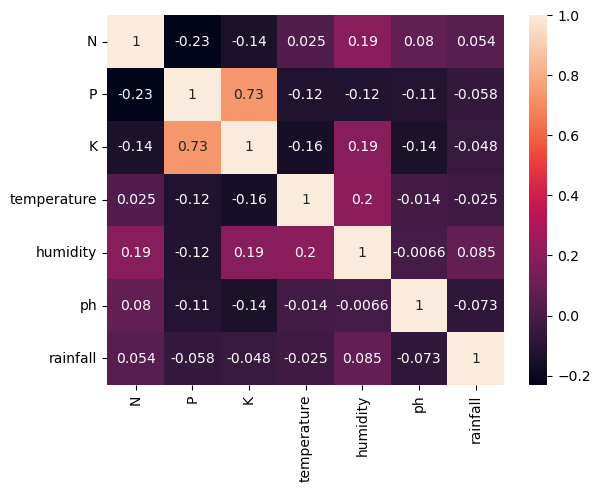

In [6]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

## Data Handeling

In [7]:
X = df.drop(['label'], axis=1).values #Leaving target
y = df['label'] #Laebl --> target

In [8]:
X

array([[ 90.        ,  42.        ,  43.        , ...,  82.00274423,
          6.50298529, 202.9355362 ],
       [ 87.        ,  44.        ,  40.        , ...,  81.79466414,
          5.95820943, 174.69384331],
       [ 88.        ,  45.        ,  43.        , ...,  81.32486108,
          6.23269008, 218.07907287],
       ...,
       [105.        ,  15.        ,  32.        , ...,  60.03174832,
          7.47009302, 156.1884599 ],
       [106.        ,  18.        ,  29.        , ...,  61.18398156,
          6.02203939, 134.22365722],
       [102.        ,  18.        ,  30.        , ...,  60.11842932,
          6.96457737, 106.91457067]])

In [9]:
y

0          rice
1          rice
2          rice
3          rice
4          rice
          ...  
54995    coffee
54996    coffee
54997    coffee
54998    coffee
54999    coffee
Name: label, Length: 55000, dtype: object

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
X_train.shape

(44000, 7)

In [12]:
y_train.shape

(44000,)

In [13]:
X_test.shape

(11000, 7)

In [14]:
y_test.shape

(11000,)

In [15]:
# from sklearn.preprocessing import MinMaxScaler
# normalizer = MinMaxScaler()
# X_train = normalizer.fit_transform(X_train)

In [16]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)

In [17]:
X_train

array([[ 92.        ,   8.        ,  53.        , ...,  92.34559394,
          5.18901569,  24.74867144],
       [ 60.        ,  52.        ,  44.        , ...,  85.36032277,
          6.93769441, 218.60126373],
       [104.        ,  20.        ,  37.        , ...,  58.00587594,
          6.83472956, 203.6410914 ],
       ...,
       [ 31.        , 137.        , 201.        , ...,  93.78233999,
          6.30181867, 156.65506626],
       [ 61.        ,  41.        ,  18.        , ...,  64.30043329,
          5.56690749,  37.06342669],
       [ 35.        ,  75.        ,  18.        , ...,  64.6955738 ,
          7.02769697,  37.67018243]])

In [18]:
y_test

44608         papaya
49966         cotton
21460         lentil
25403         banana
37964          apple
            ...     
7634     kidneybeans
26201         banana
24888    pomegranate
47716         cotton
19820      blackgram
Name: label, Length: 11000, dtype: object

## Model Creation

In [19]:
#Creating list to save model and its accuracy
model = []
accuracy = []
dict_accuracy_of_model = {}

In [20]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
label = df['label']

### 1. Descison Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
Decisiontree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
model_decision_tree = Decisiontree.fit(X_train, y_train)

In [22]:
#Predicting values of test data i.e X_test
y_pred_decisiontree = model_decision_tree.predict(X_test)

In [23]:
decision_test_df = pd.DataFrame(y_test)

In [24]:
decision_test_df['abc'] = y_pred_decisiontree

In [25]:
decision_test_df

,label,abc
44608,papaya,papaya
49966,cotton,cotton
21460,lentil,lentil
25403,banana,banana
37964,apple,apple
...,...,...
7634,kidneybeans,kidneybeans
26201,banana,banana
24888,pomegranate,pomegranate
47716,cotton,cotton


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
dtree_accuracy = accuracy_score(y_test, y_pred_decisiontree)

In [27]:
dtree_accuracy

0.8613636363636363

In [28]:
print(classification_report(y_test, y_pred_decisiontree))

C:\Users\afraa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00       498
      banana       1.00      0.99      0.99       473
   blackgram       0.00      0.00      0.00       513
    chickpea       1.00      1.00      1.00       517
     coconut       0.88      0.90      0.89       489
      coffee       0.90      0.99      0.94       486
      cotton       0.99      0.99      0.99       535
      grapes       1.00      1.00      1.00       525
        jute       0.95      0.24      0.38       523
 kidneybeans       1.00      1.00      1.00       528
      lentil       0.47      1.00      0.64       506
       maize       0.88      0.87      0.87       489
       mango       0.88      0.96      0.92       475
   mothbeans       0.93      0.50      0.65       517
    mungbean       1.00      0.98      0.99       481
   muskmelon       0.92      0.99      0.95       470
      orange       1.00      1.00      1.00       496
      papaya       0.97    

C:\Users\afraa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\afraa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
dict_accuracy_of_model['descision_tree'] = dtree_accuracy

In [30]:
#Checking cross val_score
from sklearn.model_selection import cross_val_score
score = cross_val_score(Decisiontree, features, target,cv=5)
score

array([0.86145455, 0.86618182, 0.87572727, 0.83872727, 0.85445455])

In [31]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'Models/decision_tree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(Decisiontree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

### 2. SVM

In [33]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)

X_test_norm = norm.transform(X_test)

svm = SVC(kernel='poly', degree=3, C=1)
svm.fit(X_train_norm, y_train)
predicted_values = svm.predict(X_test_norm)
x = accuracy_score(y_test, predicted_values)
model.append('SVM')
print("SVM's Accuracy is: ", x)

SVM's Accuracy is:  0.9661818181818181


In [34]:
dict_accuracy_of_model['svm'] = x

In [35]:
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00       498
      banana       1.00      1.00      1.00       473
   blackgram       0.91      0.88      0.90       513
    chickpea       1.00      1.00      1.00       517
     coconut       0.99      0.99      0.99       489
      coffee       1.00      1.00      1.00       486
      cotton       1.00      1.00      1.00       535
      grapes       1.00      1.00      1.00       525
        jute       0.80      0.85      0.82       523
 kidneybeans       1.00      1.00      1.00       528
      lentil       0.88      0.92      0.90       506
       maize       0.99      1.00      1.00       489
       mango       0.99      0.99      0.99       475
   mothbeans       0.97      0.96      0.96       517
    mungbean       1.00      1.00      1.00       481
   muskmelon       0.98      0.99      0.99       470
      orange       1.00      1.00      1.00       496
      papaya       1.00    

In [36]:
# Cross validation score (SVM)
score = cross_val_score(svm,features,target,cv=5)
score

array([0.94645455, 0.95972727, 0.95509091, 0.954     , 0.95690909])

In [37]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'Models/svm.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(svm, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

### 3. Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state=2)
reg_model = reg.fit(X_train,y_train)

C:\Users\afraa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
y_pred_reg = reg_model.predict(X_test)

In [40]:
x = accuracy_score(y_test, predicted_values)
print("Logistic Regression's Accuracy is: ", x)

Logistic Regression's Accuracy is:  0.9661818181818181


In [41]:
print(classification_report(y_test,y_pred_reg))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00       498
      banana       0.99      1.00      0.99       473
   blackgram       0.78      0.78      0.78       513
    chickpea       1.00      1.00      1.00       517
     coconut       0.99      0.97      0.98       489
      coffee       0.98      0.97      0.98       486
      cotton       0.90      0.94      0.92       535
      grapes       1.00      1.00      1.00       525
        jute       0.73      0.77      0.75       523
 kidneybeans       1.00      1.00      1.00       528
      lentil       0.88      0.86      0.87       506
       maize       0.90      0.83      0.87       489
       mango       0.97      0.97      0.97       475
   mothbeans       0.81      0.79      0.80       517
    mungbean       0.96      1.00      0.98       481
   muskmelon       0.74      0.78      0.76       470
      orange       1.00      1.00      1.00       496
      papaya       0.95    

In [42]:
score = cross_val_score(reg_model,features,target,cv=5)
score

C:\Users\afraa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\afraa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.90272727, 0.90563636, 0.90845455, 0.91245455, 0.91      ])

In [43]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'Models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(reg_model, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

In [44]:
dict_accuracy_of_model['Logistic Regression'] = x

In [45]:
dict_accuracy_of_model

{'descision_tree': 0.8613636363636363,
 'svm': 0.9661818181818181,
 'Logistic Regression': 0.9661818181818181}

In [46]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'Models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(reg_model, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

### 4. Random Forest 

In [47]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [48]:
y_pred_rf = RF.predict(X_test)

In [49]:
x = accuracy_score(y_test, y_pred_rf)
print(x)

0.9837272727272727


In [50]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00       498
      banana       1.00      1.00      1.00       473
   blackgram       0.93      0.96      0.95       513
    chickpea       1.00      1.00      1.00       517
     coconut       0.99      0.99      0.99       489
      coffee       1.00      1.00      1.00       486
      cotton       1.00      1.00      1.00       535
      grapes       1.00      1.00      1.00       525
        jute       0.92      0.92      0.92       523
 kidneybeans       1.00      1.00      1.00       528
      lentil       0.95      0.94      0.95       506
       maize       1.00      1.00      1.00       489
       mango       0.99      0.99      0.99       475
   mothbeans       0.98      0.99      0.98       517
    mungbean       1.00      1.00      1.00       481
   muskmelon       0.99      1.00      0.99       470
      orange       1.00      1.00      1.00       496
      papaya       1.00    

In [51]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.96709091, 0.96845455, 0.97281818, 0.96963636, 0.972     ])

In [52]:
dict_accuracy_of_model['RF'] = x

In [54]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'Models/Random_Forest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

### 5. Gaussian Naive Bayes 

In [55]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train,y_train)

GaussianNB()

In [56]:
y_pred_nb = NaiveBayes.predict(X_test)
x = accuracy_score(y_test, y_pred_nb)
print(x)

0.9683636363636363


In [57]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00       498
      banana       1.00      1.00      1.00       473
   blackgram       0.89      0.90      0.89       513
    chickpea       1.00      1.00      1.00       517
     coconut       0.99      0.99      0.99       489
      coffee       0.99      1.00      0.99       486
      cotton       0.99      1.00      0.99       535
      grapes       1.00      1.00      1.00       525
        jute       0.86      0.86      0.86       523
 kidneybeans       1.00      1.00      1.00       528
      lentil       0.88      0.90      0.89       506
       maize       1.00      0.98      0.99       489
       mango       0.99      0.99      0.99       475
   mothbeans       0.97      0.95      0.96       517
    mungbean       1.00      1.00      1.00       481
   muskmelon       0.96      0.99      0.98       470
      orange       1.00      1.00      1.00       496
      papaya       1.00    

In [58]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.96536364, 0.96936364, 0.96918182, 0.96954545, 0.97063636])

In [59]:
dict_accuracy_of_model['Naive Bayes'] = x

In [60]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'Models/NB.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

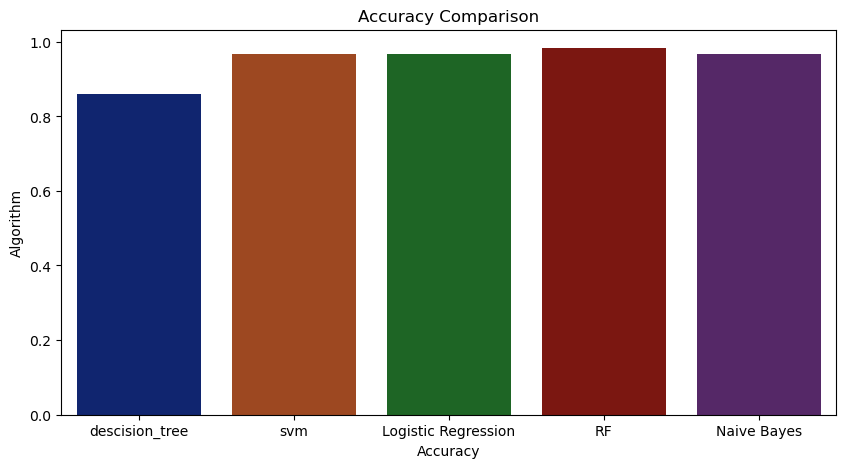

In [61]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = list(dict_accuracy_of_model.keys()),y = list(dict_accuracy_of_model.values()),palette='dark')

In [62]:
for k in dict_accuracy_of_model:
    print(k, ' --> ', dict_accuracy_of_model[k])

descision_tree  -->  0.8613636363636363
svm  -->  0.9661818181818181
Logistic Regression  -->  0.9661818181818181
RF  -->  0.9837272727272727
Naive Bayes  -->  0.9683636363636363


In [63]:
dict_accuracy_of_model

{'descision_tree': 0.8613636363636363,
 'svm': 0.9661818181818181,
 'Logistic Regression': 0.9661818181818181,
 'RF': 0.9837272727272727,
 'Naive Bayes': 0.9683636363636363}

In [64]:
for i in dict_accuracy_of_model:
    print(dict_accuracy_of_model[i])

0.8613636363636363
0.9661818181818181
0.9661818181818181
0.9837272727272727
0.9683636363636363


In [65]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [66]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


In [67]:
import pickle
crop_recommendation_model_path = 'Models/Random_Forest.pkl'
crop_recommendation_model = pickle.load(open(crop_recommendation_model_path, 'rb'))

In [ ]:
import os

scores = {} # scores is an empty dict already

if os.path.getsize(crop_recommendation_model_path) > 0:      
    with open(crop_recommendation_model_path, "rb") as f:
        unpickler = pickle.Unpickler(f)
        # if file is not empty scores will be equal
        # to the value unpickled
        scores = unpickler.load()

In [68]:
crop_recommendation_model

RandomForestClassifier(n_estimators=20, random_state=0)